<a href="https://colab.research.google.com/github/CatDawn29/Catherine-Project-2.0/blob/main/Tippins_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Set 2: Stroke Prediction
Source of data: Kaggle.com, from the pre approved data sets

Brief description of data: This data gives us the various descriptions of the underlying factors of why someone has a stroke.

What is the target? My focus target is the prediction of who will get a stroke based on underlying factors.

What does one row represent? (A person? A business? An event? A product?): Each row represents a different person

Is this a classification or regression problem?: I would say that this is an regression problem due to the fact it is predicting if someone will get a stroke or not.

How many features does the data have?: 12 attributes

How many rows are in the dataset?: 5110 rows

What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?: The challenge I forsee is maybe having to do classification for this instead of regression, due to some of the columns being yes or no.

In [ ]:
#Basic Pandas and Numpy
import numpy as np
import pandas as pd

#EDA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

#Pre-Processing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Regression Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Classification Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
filename = ('/content/healthcare-dataset-stroke-data.csv')
stroke_df = pd.read_csv(filename)

In [ ]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
stroke_df.drop(columns = ["ever_married"], inplace = True)
stroke_df.head()

,id,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
stroke_df.drop(columns = ["id"], inplace = True)
stroke_df.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1


I dropped ever married and id, because I believe there is greater causes to stroke relate causes than if a person was ever married and I do not see how id is related to how someone can get a stroke or not.

##Cleaning Data for Analysis
*Drop unnecessary columns

*Check for Duplicates

*Check for Categorical Issues

*Make sure Data Types Match with Data Dict

*Check for outliers/impossible numerical values

*Checking (but not fixing) missing values (will do this after train-test split)

In [ ]:
stroke_df.shape
print(f'There are {stroke_df.shape[0]} rows, and {stroke_df.shape[1]} columns.')
print(f'The rows represent {stroke_df.shape[0]} observations, and the columns represent {stroke_df.shape[1]-1} features and 1 target variable.')

There are 5110 rows, and 10 columns.
The rows represent 5110 observations, and the columns represent 9 features and 1 target variable.


In [ ]:
stroke_df.duplicated().sum()

0

In [ ]:
stroke_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
stroke_df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
stroke_df["gender"].replace({"Other": "Male"}, inplace = True)
stroke_df["gender"].value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

In [ ]:
stroke_df["age"].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [ ]:
stroke_df["age"].replace({"1.40": "14",
                          "0.48": "48",
                          "0.16": "16",
                          "0.40": "40",
                          "0.08": "8"}, inplace = True)
stroke_df["age"].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

This is where I do not get why some of the ages did not change above.

In [ ]:
stroke_df["hypertension"].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [ ]:
stroke_df["heart_disease"].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [ ]:
stroke_df["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
stroke_df["Residence_type"].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
stroke_df["avg_glucose_level"].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

In [ ]:
stroke_df["bmi"].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [ ]:
stroke_df["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
stroke_df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
print(stroke_df.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [ ]:
stroke_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
print(stroke_df.isna().sum()/len(stroke_df)*100)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


#Univariate Visualizations: Histograms and Barplots

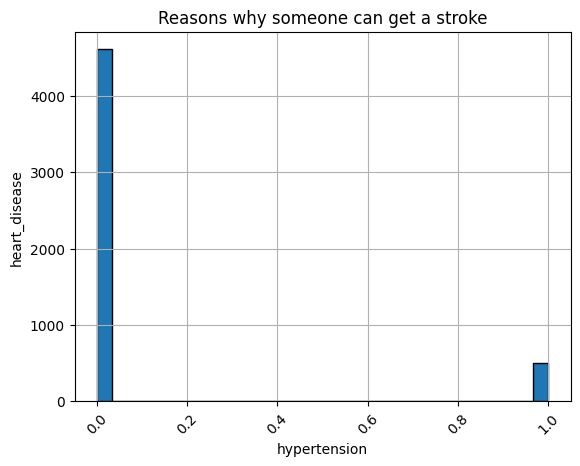

In [ ]:
ax = stroke_df['hypertension'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Reasons why someone can get a stroke')
ax.set_xlabel('hypertension')
ax.set_ylabel('heart_disease');

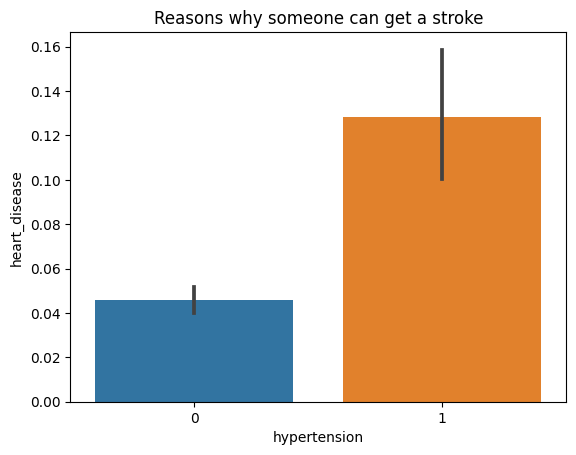

In [ ]:
ax = sns.barplot(data=stroke_df, x='hypertension', y='heart_disease');
ax.set_title("Reasons why someone can get a stroke");

#Multivariate Visualization: Scatterplot

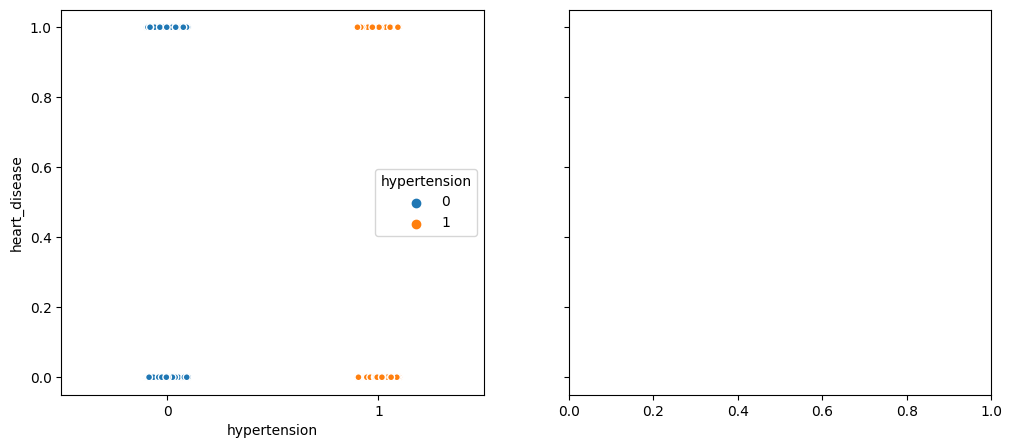

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
sns.stripplot(data=stroke_df, x='hypertension', y='heart_disease',ax=axes[0],
                   hue='hypertension', edgecolor='white', linewidth=1);

- I chose the features of heart disease and hypertension because to me it shows that the higher the hypertension and heart disease the higher risk of having a stroke.